In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams

# 设置字体（SimHei 是常用的中文字体）
rcParams['font.sans-serif'] = ['SimHei']  # 用于正常显示中文标签
rcParams['axes.unicode_minus'] = False   # 用于正常显示负号

In [62]:
data = pd.read_csv('advertising.csv')
df = pd.DataFrame(data)
df.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


回归系数： [4.62506958e+00 1.19660391e-02 1.33754561e-02 4.19786914e-05]
均方误差： 2.7060830662682425


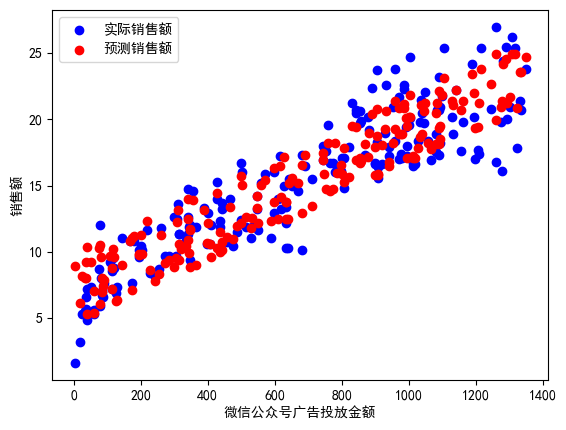

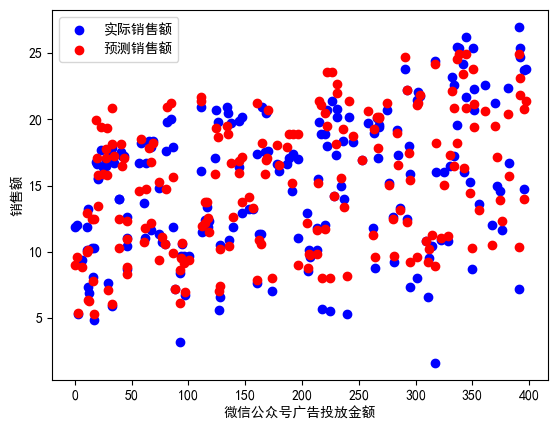

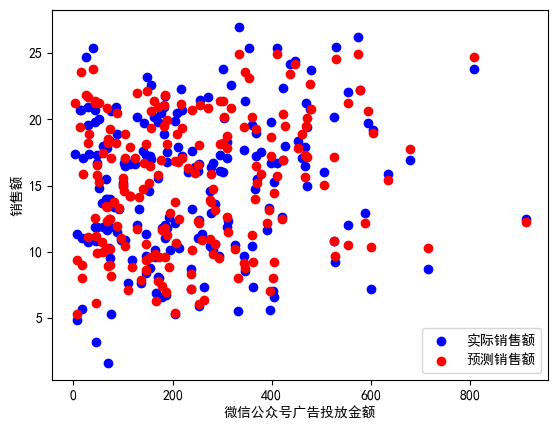

In [66]:
# Z-score标准化函数
def z_score_normalization(data):
    mu = np.mean(data, axis=0)  
    sigma = np.std(data, axis=0) 
    return (data - mu) / sigma  

X = np.array(data[['wechat', 'weibo', 'others']]) 
y = data['sales'].values  

X_norm = z_score_normalization(X)  
y_norm = z_score_normalization(y.reshape(-1, 1)) 

X = np.c_[np.ones(X.shape[0]), X]

# 使用最小二乘法计算回归系数
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("回归系数：", beta)

# 用模型预测
y_pred = X.dot(beta)

# 计算均方误差（MSE）
mse = np.mean((y - y_pred)**2)
print("均方误差：", mse)

# 可视化实际销售额与预测销售额的对比
plt.scatter(df['wechat'], y, color='blue', label='实际销售额')
plt.scatter(df['wechat'], y_pred, color='red', label='预测销售额')
plt.xlabel('微信公众号广告投放金额')
plt.ylabel('销售额')
plt.legend()
plt.show()

plt.scatter(df['weibo'], y, color='blue', label='实际销售额')
plt.scatter(df['weibo'], y_pred, color='red', label='预测销售额')
plt.xlabel('微信公众号广告投放金额')
plt.ylabel('销售额')
plt.legend()
plt.show()

plt.scatter(df['others'], y, color='blue', label='实际销售额')
plt.scatter(df['others'], y_pred, color='red', label='预测销售额')
plt.xlabel('微信公众号广告投放金额')
plt.ylabel('销售额')
plt.legend()
plt.show()